In [1]:
import seaborn as sns
import pandas as  pd 
import numpy as np 
import matplotlib.pyplot as plt 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks")

In [4]:
!ls

creditcard.csv	Untitled0.ipynb


In [0]:
data = pd.read_csv("creditcard.csv")

In [6]:
print(data.shape)
print(data.head())

(61019, 31)
   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0     0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62    0.0
1     0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69    0.0
2     1 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66    0.0
3     1 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50    0.0
4     2 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99    0.0

[5 rows x 31 columns]


In [0]:

fraud = data.loc[data['Class']==1]     #Column Class when the value is 1 then is fraud case 
normal = data.loc[data['Class']==0]    #Column Class when the value is 0 then is normal  

In [8]:
#count the number of fraud case

#fraud.count()
len(fraud)

163

In [9]:
len(normal)

60855

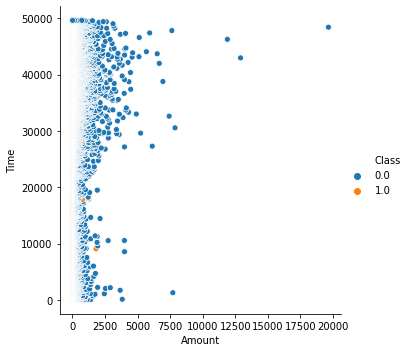

In [10]:
sns.relplot(x='Amount' , y='Time' , hue = 'Class',data=data)

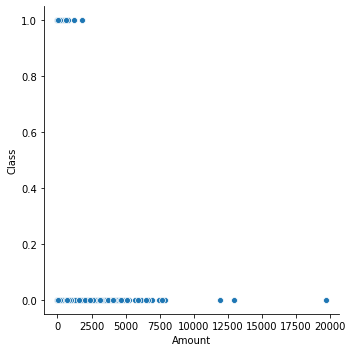

In [11]:
sns.relplot(x='Amount' , y='Class' ,data=data)

In [17]:

data['Class'] = data['Class'].fillna(0)
data['Amount'] = data['Amount'].fillna(0)
data['V28'] = data['V28'].fillna(0)
data['V27'] = data['V27'].fillna(0)
data['V20'] = data['V20'].fillna(0)
data['V21'] = data['V21'].fillna(0)
data['V22'] = data['V22'].fillna(0)
data['V23'] = data['V23'].fillna(0)
data['V24'] = data['V24'].fillna(0)
data['V25'] = data['V25'].fillna(0)
data['V26'] = data['V26'].fillna(0)
print(data.tail())

#Logistic Regression

        Time        V1        V2        V3  ...       V27       V28  Amount  Class
61014  49610  1.135509 -0.715510 -0.150128  ... -0.002305  0.046592  133.21    0.0
61015  49612 -0.239038 -2.373542  0.100497  ... -0.036788  0.146910  724.19    0.0
61016  49612 -0.866623  1.013362 -0.298784  ...  0.322330  0.222588  164.46    0.0
61017  49613 -1.469197  0.920104  0.624255  ... -0.226264 -0.009676   15.16    0.0
61018  49615  1.358720 -0.650369 -0.269107  ...  0.000000  0.000000    0.00    0.0

[5 rows x 31 columns]


In [0]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [0]:
X = data.iloc[:,:-1]
y= data['Class']

In [0]:
X_train, X_test , y_train , y_test = train_test_split(X ,y , test_size=0.35)

In [0]:
clf = linear_model.LogisticRegression(C=1e5)

In [22]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = np.array(clf.predict(X_test))
y = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
print(confusion_matrix(y,y_pred))

[[21299    13]
 [   17    28]]


In [32]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     21312
         1.0       0.68      0.62      0.65        45

    accuracy                           1.00     21357
   macro avg       0.84      0.81      0.83     21357
weighted avg       1.00      1.00      1.00     21357



In [33]:
print(accuracy_score(y,y_pred))

0.9985953083298216
